# **98% Accuracy - Chest X-ray Images (Pneumonia or Normal) Classification using CNN**
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs13369-021-06127-z/MediaObjects/13369_2021_6127_Fig2_HTML.png)


   **98% Accuracy in Predicting if the X-ray is of a Pneumonia Patient or not**

> # Importing and labeling the data

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2


warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
Train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
Test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
Val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'


Categories = os.listdir(Train_dir)
print("Train",Categories, "0 is Pneumonia and 1 is Normal")



img_size = 150
def create_data(dir):
    data = []
    for d in os.listdir(dir):
        path_dir = os.path.join(dir,d)
        class_num = Categories.index(d)
        for file in os.listdir(path_dir):
            img_array = cv2.imread(os.path.join(path_dir,file), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_img_array, class_num])
    return data
training_data = create_data(Train_dir)
testing_data = create_data(Test_dir)
validation_data = create_data(Val_dir)

Train ['PNEUMONIA', 'NORMAL'] 0 is Pneumonia and 1 is Normal


> # Shuffling the data so that random samples are provided to the model while training

In [22]:
import random 

random.shuffle(training_data)

X_train = []
y_train = []

for features,labels in training_data:
    X_train.append(features)
    y_train.append(labels)
print(X_train[:1], y_train[:1])

[array([[27, 36, 41, ..., 81, 67, 49],
       [33, 39, 41, ..., 69, 65, 47],
       [35, 36, 41, ..., 66, 59, 53],
       ...,
       [ 2,  0,  0, ...,  7,  4,  3],
       [ 3,  0,  0, ..., 11,  5,  4],
       [ 0,  0,  2, ..., 10,  8,  5]], dtype=uint8)] [0]


> # Plotting a few sample images

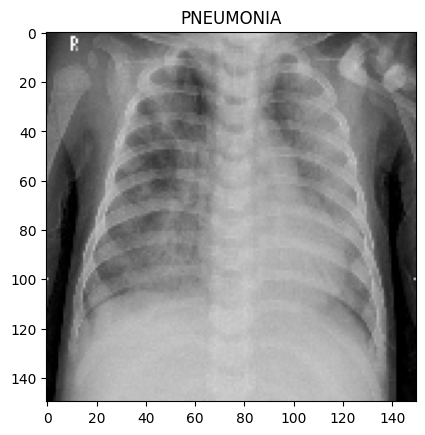

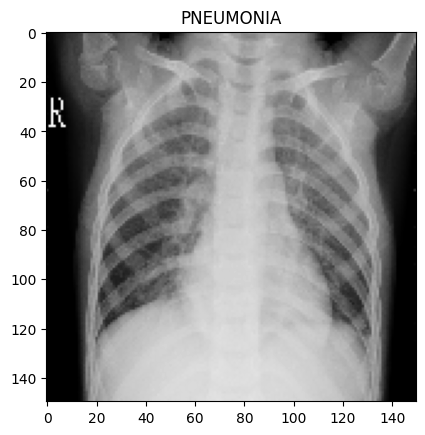

In [23]:
import matplotlib.pyplot as plt

for img,label in zip(X_train[:2], y_train[:2]):
    plt.imshow(img, cmap='gray')
    plt.title(Categories[label])
    plt.show()

> # Reshaping and converting X and y to numpy arrays for Training 

In [24]:
from keras.utils import to_categorical

X = np.array(X_train).reshape(-1, img_size,img_size, 1)
X = X / 255.0
y = np.array(y_train)
print(X[:1], y[:1])

[[[[0.10588235]
   [0.14117647]
   [0.16078431]
   ...
   [0.31764706]
   [0.2627451 ]
   [0.19215686]]

  [[0.12941176]
   [0.15294118]
   [0.16078431]
   ...
   [0.27058824]
   [0.25490196]
   [0.18431373]]

  [[0.1372549 ]
   [0.14117647]
   [0.16078431]
   ...
   [0.25882353]
   [0.23137255]
   [0.20784314]]

  ...

  [[0.00784314]
   [0.        ]
   [0.        ]
   ...
   [0.02745098]
   [0.01568627]
   [0.01176471]]

  [[0.01176471]
   [0.        ]
   [0.        ]
   ...
   [0.04313725]
   [0.01960784]
   [0.01568627]]

  [[0.        ]
   [0.        ]
   [0.00784314]
   ...
   [0.03921569]
   [0.03137255]
   [0.01960784]]]] [0]


In [25]:
print(X.shape, y.shape)
X.shape[1:]

(5216, 150, 150, 1) (5216,)


(150, 150, 1)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU


Model = Sequential()

Model.add(Conv2D(32, (3,3), padding = 'same', input_shape=X.shape[1:]))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(64, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(96, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(256, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(320, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(320, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))


Model.add(Flatten())

Model.add(Dense(256))
Model.add(Activation('relu'))
# Model.add(Dropout(0.2))

Model.add(Dense(64))
Model.add(Activation('relu'))
# Model.add(Dropout(0.2))

Model.add(Dense(32))
Model.add(Activation('relu'))

Model.add(Dense(1))
Model.add(Activation('sigmoid'))

Model.summary()

Model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])

History = Model.fit(X, y, batch_size = 64, epochs = 10,validation_split = 0.1)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 37, 37, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 18, 18, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 320)      │       737,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 4, 4, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 2, 2, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 2, 2, 320)      │       921,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 2, 2, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 1, 1, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        16,44

 Total params: 2,240,353 (8.55 MB)

 Trainable params: 2,240,353 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7413 - loss: 0.6429 - val_accuracy: 0.7529 - val_loss: 0.5521
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7610 - loss: 0.4867 - val_accuracy: 0.8372 - val_loss: 0.3757
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8912 - loss: 0.2634 - val_accuracy: 0.9253 - val_loss: 0.2317
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9557 - loss: 0.1172 - val_accuracy: 0.9579 - val_loss: 0.1428
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9686 - loss: 0.0910 - val_accuracy: 0.9617 - val_loss: 0.1202
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9717 - loss: 0.0815 - val_accuracy: 0.8946 - val_loss: 0.2719
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9733 - loss: 0.0685 - val_accuracy: 0.9617 - val_loss: 0.1086
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9814 - loss: 0.0562 - val_accuracy: 0.9655 - v

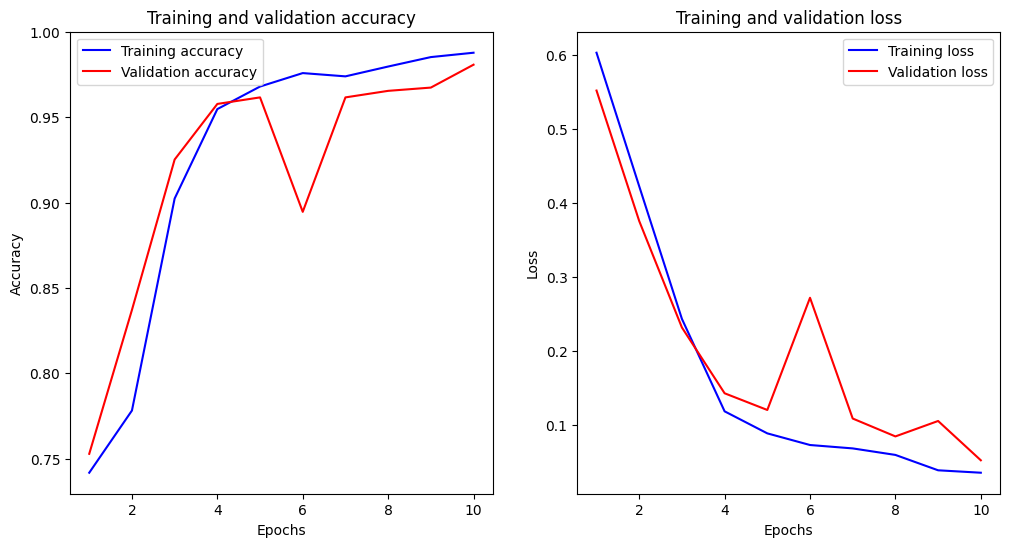

In [27]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
loss = History.history['loss']
val_loss = History.history['val_loss']


epochs = range(1, len(acc) + 1)


# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
X_val = []
y_val = []

for X, y in validation_data:
    X_val.append(X)
    y_val.append(y)
    


X_val = np.array(X_val).reshape(-1, img_size,img_size, 1)
X_val = X_val / 255.0
y_val = np.array(y_val)

Val_Eval = Model.evaluate(X_val, y_val, batch_size = 32)
Val_Eval

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 1.0000 - loss: 0.0447


[0.0446794219315052, 1.0]

In [29]:
X_test = []
y_test = []

for X, y in testing_data:
    X_test.append(X)
    y_test.append(y)
    


X_test = np.array(X_test).reshape(-1, img_size,img_size, 1)
X_test = X_test / 255.0
y_test = np.array(y_test)

Test_Eval = Model.evaluate(X_test, y_test, batch_size = 32)
Test_Eval

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9293 - loss: 0.5253


[1.7635509967803955, 0.7756410241127014]

In [30]:
from sklearn.metrics import mean_squared_error
# sklearn.metrics.mean_squared_error
y_pred_test = Model.predict(X_test)
y_pred_val = Model.predict(X_val)

MSE_val = mean_squared_error(y_val, y_pred_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error")
print("Validation Set: ", MSE_val, "Testing Set: ", MSE_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Squared Error
Validation Set:  0.006118596415296896 Testing Set:  0.21145637106909504
